## **Problem Definition**

Here I have use a car dataset,by using it we have predict the selling price of car based on the certain feature.So we will use regression machine learning algorithms to solve this problem. 

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Gathering**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
car_dataset = pd.read_csv('/content/gdrive/MyDrive/Project1/car data.csv')
car_dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


### **Data Preparation**

In [4]:
# checking no of row and columns in dataset
car_dataset.shape

(301, 9)

In [5]:
# checking data type of columns
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Dataset contain 301 rows and 9 columns , all datatype are correctly mentioned.

In [6]:
# checking the missing value in dataset
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

There are no missing value in dataset

In [7]:
# checking statistical summary of all the columns with numerical values
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## **Feature Engineering**

In [8]:
# adding a column with the current year
car_dataset['Current_year'] = 2021
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [9]:
# creating a new column which will determine the age of car
car_dataset['Age_of_vehicle'] = car_dataset['Current_year'] - car_dataset['Year']
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,Age_of_vehicle
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [10]:
# converting string into numeric value
final_car_dataset = pd.get_dummies(car_dataset,columns=['Fuel_Type','Seller_Type','Transmission'],drop_first=True)

#droping the columns which are redundant
final_car_dataset = final_car_dataset.drop(columns=['Car_Name','Year','Current_year'])

final_car_dataset.head()


,Selling_Price,Present_Price,Kms_Driven,Owner,Age_of_vehicle,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


Fuel type feature: 

*   Petrol - 1 
*   Diesel - 0

Seller_type  feature: 

*   Dealer - 1
*   Individual - 0

Transmissiom feature:  

*   Manual - 1
*   Automatic - 0


### **Pairplot**

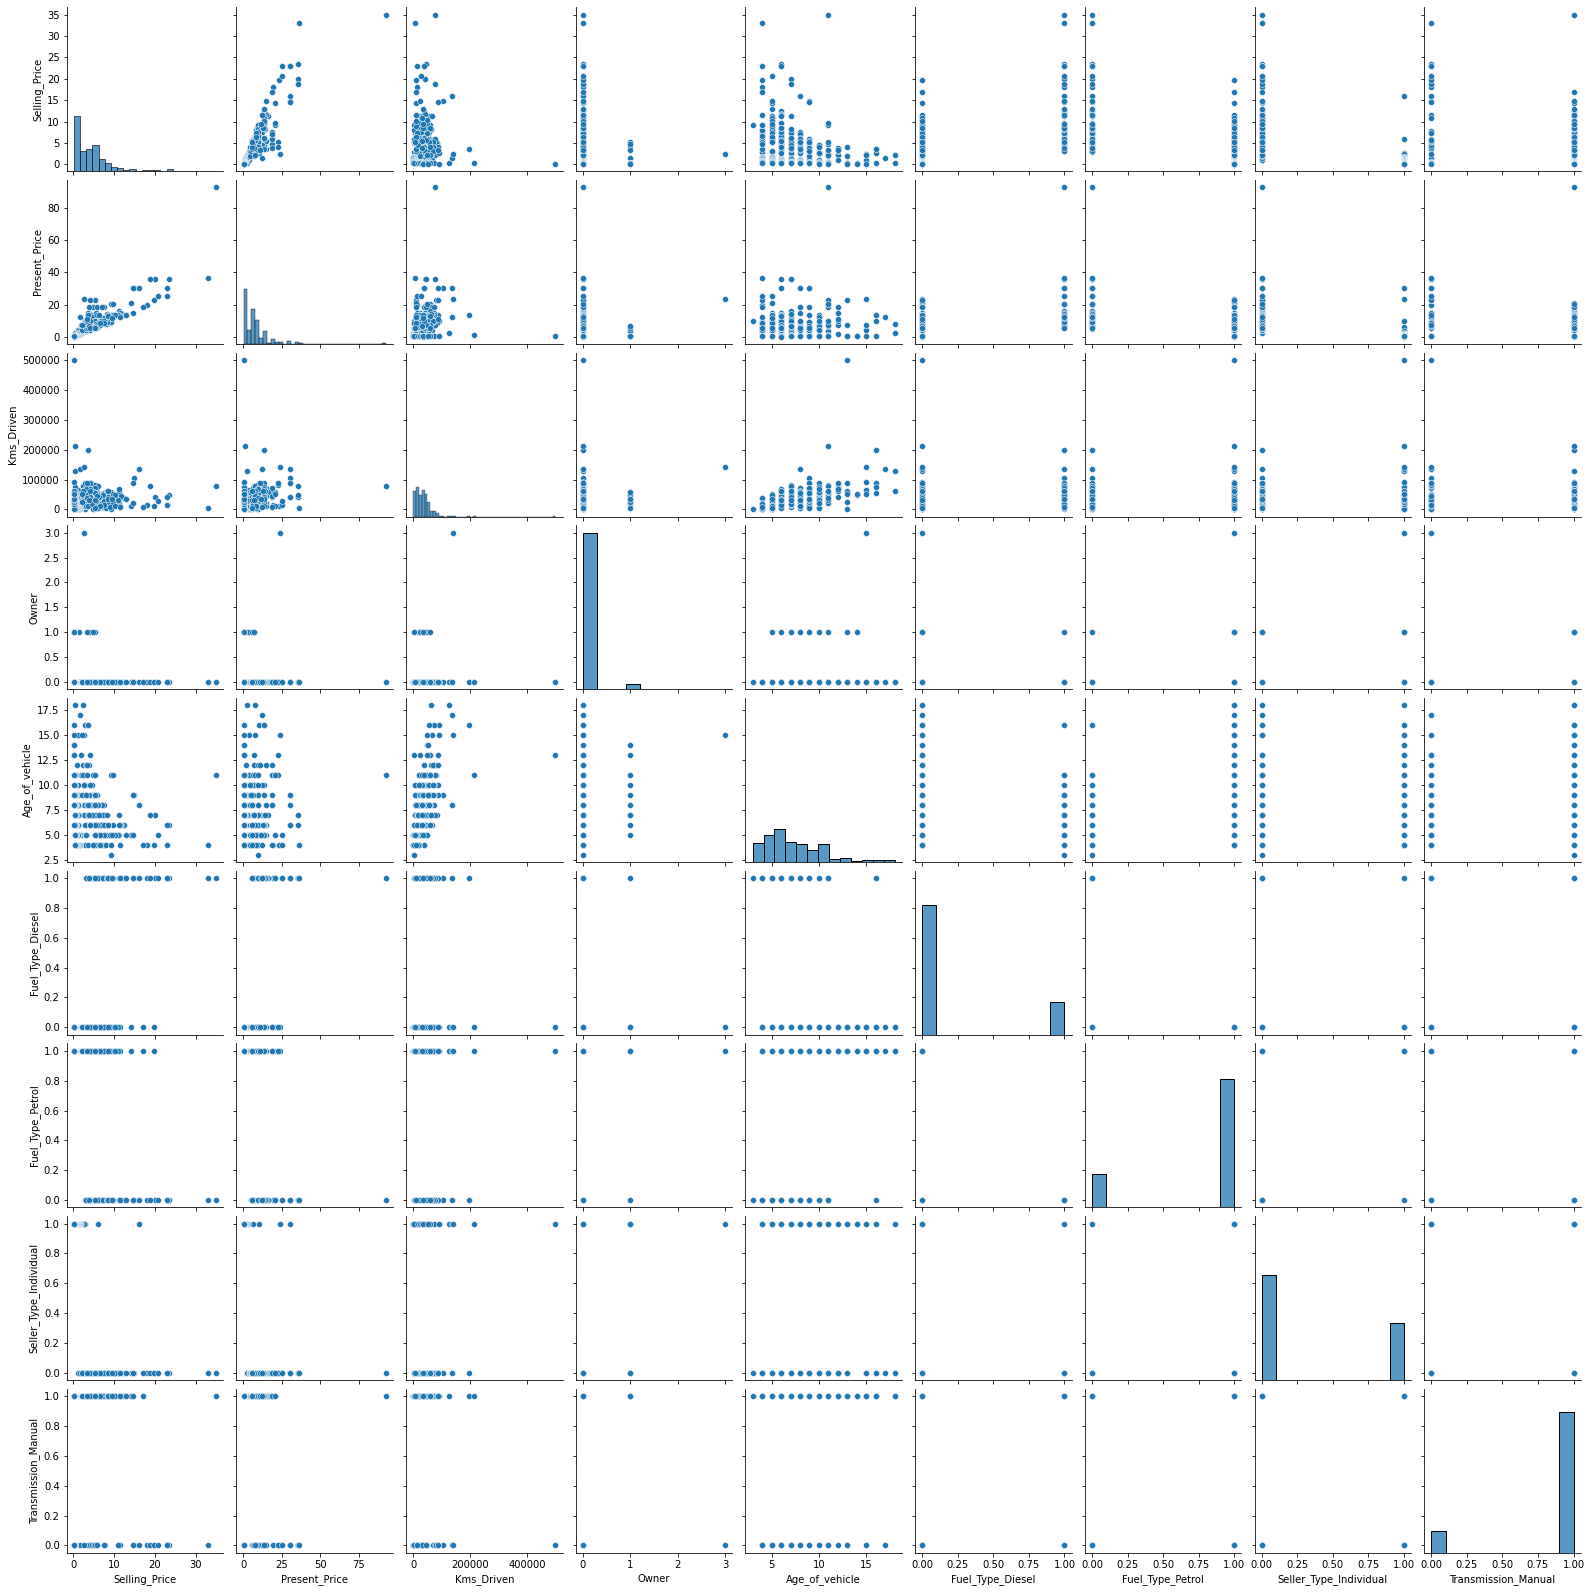

In [11]:
# pairwise relationship in dataset
sns.pairplot(final_car_dataset)

### **Heat map**

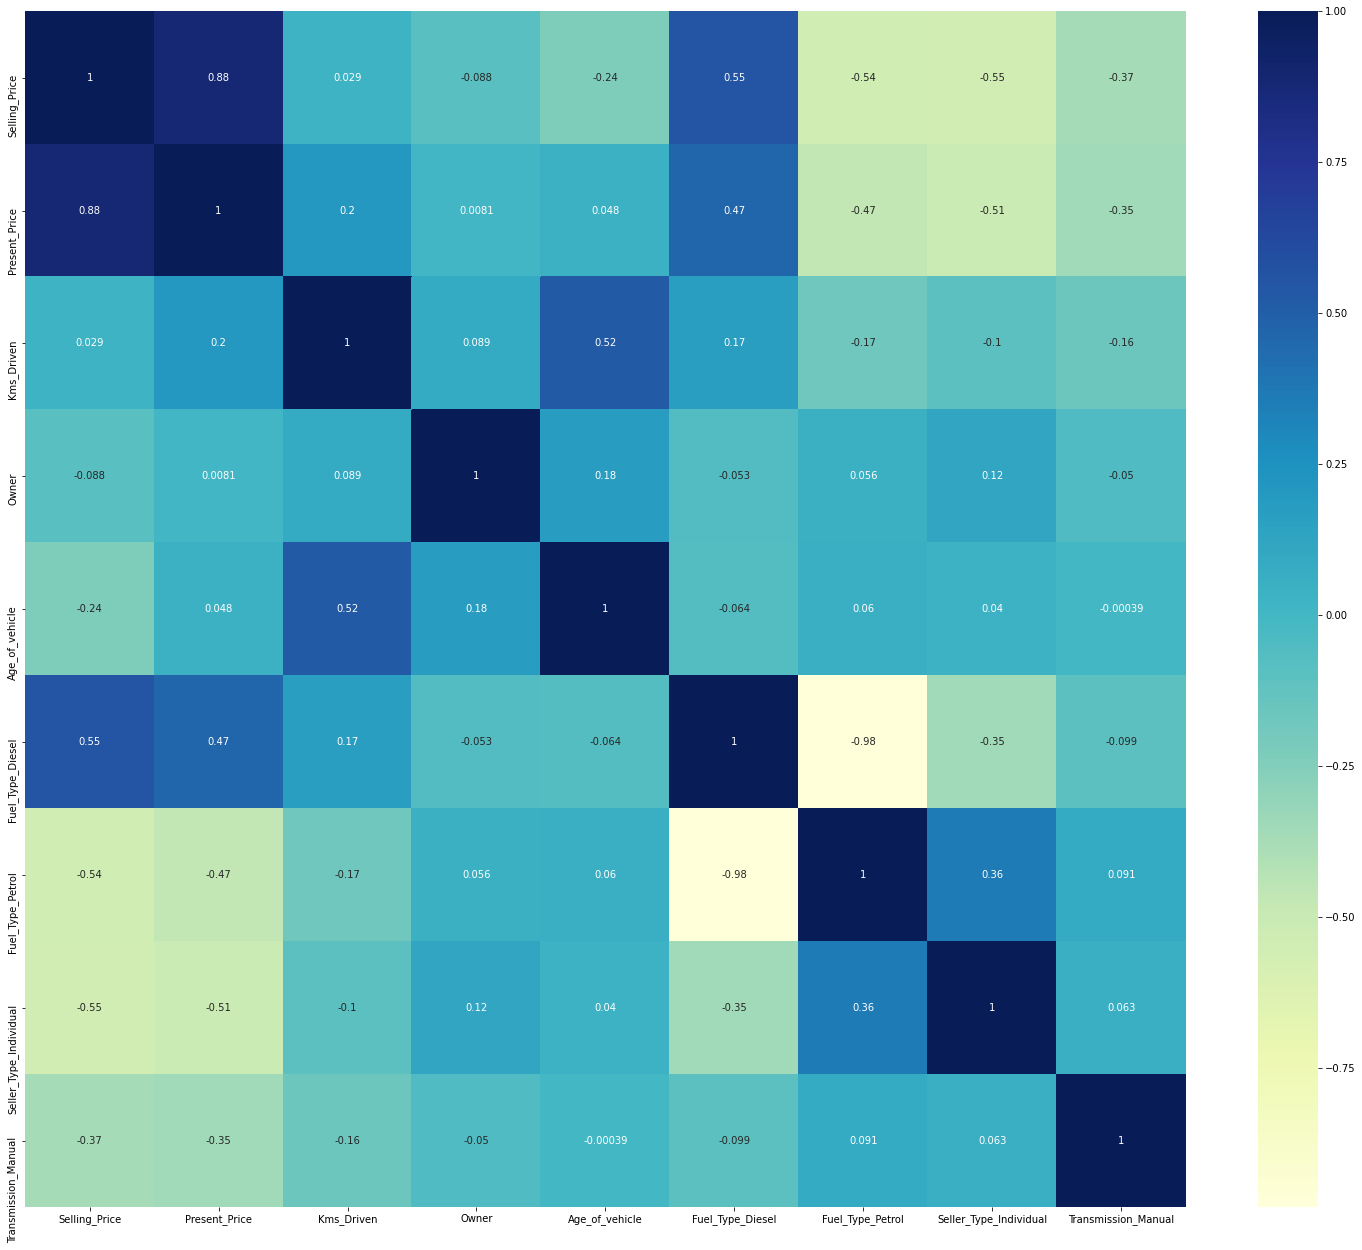

In [12]:
# create correlation matrix
correlations_matrix = final_car_dataset.corr()
index = correlations_matrix.index

plt.figure(figsize=(26,22))

sns.heatmap(final_car_dataset[index].corr(),annot = True, cmap = "YlGnBu")

In [13]:
# splitting the dataset into feature and label

X = final_car_dataset.iloc[:,1:]
Y = final_car_dataset.iloc[:,0]


In [14]:
X.head()

,Present_Price,Kms_Driven,Owner,Age_of_vehicle,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [15]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

### **Feature Importance**

In [16]:
# comparing the importance of features
from sklearn.ensemble import ExtraTreesRegressor

# creating object
model = ExtraTreesRegressor()

# fit the model
model.fit(X,Y)

print(model.feature_importances_)

[0.38971196 0.04822031 0.00048498 0.07502702 0.20475421 0.01808288
 0.13070602 0.13301262]


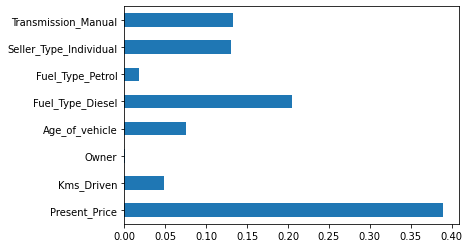

In [17]:
# plot graph of feature importances for better visualization

f_imp = pd.Series(model.feature_importances_ , index = X.columns)
f_imp.plot(kind = 'barh')
plt.show()

### **Splitting data into training and testing**

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state=2)

### **Evaluating different models**

I am using three models:


1.   Linear Regression
2.   Decision Tree
3.   Random Forest Regressor

The model with better accuracy will be choosen,



## **Linear regression Model**

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#creating object for linear regression
Reg = LinearRegression()

#fititing the linear regression model
Reg.fit(X_train,Y_train)

# predict on the test data
Y_pred = Reg.predict(X_test)

#metrics

print("Mean Absolute Error : ",metrics.mean_absolute_error(Y_test,Y_pred))

print("Mean Square Error : ",metrics.mean_squared_error(Y_test,Y_pred))

print("Root Mean Square Error : ",np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

print("R2 : ", metrics.r2_score(Y_test,Y_pred))

Mean Absolute Error :  1.1971541777665233
Mean Square Error :  2.5354633547378205
Root Mean Square Error :  1.592313836760147
R2 :  0.8242672907442591


### **Decision Tree Model**

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

#creating object for linear regression
tree = DecisionTreeRegressor()

#fititing the linear regression model
tree.fit(X_train,Y_train)

# predict on the test data
Y_pred = tree.predict(X_test)

#metrics

print("Mean Absolute Error : ",metrics.mean_absolute_error(Y_test,Y_pred))

print("Mean Square Error : ",metrics.mean_squared_error(Y_test,Y_pred))

print("Root Mean Square Error : ",np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

print("R2 : ", metrics.r2_score(Y_test,Y_pred))

Mean Absolute Error :  0.5836263736263736
Mean Square Error :  0.964330769230769
Root Mean Square Error :  0.9820034466491291
R2 :  0.9331623316980974


## **Random Forest Model**

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

#creating object for linear regression
RF = RandomForestRegressor(n_estimators = 100, random_state = 35)

#fititing the linear regression model
RF.fit(X_train,Y_train)

# predict on the test data
Y_pred = RF.predict(X_test)

#metrics

print("Mean Absolute Error : ",metrics.mean_absolute_error(Y_test,Y_pred))

print("Mean Square Error : ",metrics.mean_squared_error(Y_test,Y_pred))

print("Root Mean Square Error : ",np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

print("R2 : ", metrics.r2_score(Y_test,Y_pred))

Mean Absolute Error :  0.4756681318681326
Mean Square Error :  0.637879316703298
Root Mean Square Error :  0.7986734731436234
R2 :  0.9557886489295907


# R2 score must be maximum and Errors to be minimum for better results

Random forest regression is giving better result.Therefore i will hyptertune this model and then fir,predict. 

### **Hyperparamter tuning**

In [23]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(i) for i in np.linspace(100,1200,12)]

# Number of features to consider at every split
max_features = ['auto','sqrt']

# Maximum number of levels in tree
max_depth = [int(i) for i in np.linspace(5,30,num=6)]

# Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [24]:
# Create the random grid
random_grid = {'n_estimators' : n_estimators,
               'max_features': max_features,
               'max_depth' : max_depth, 
               'min_samples_split': min_samples_split,
               'min_samples_leaf':min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [25]:
# base model for tunning
RF = RandomForestRegressor()

# search 100 different combination
RF_random = RandomizedSearchCV(estimator=RF, param_distributions= random_grid, scoring='neg_mean_squared_error', n_iter=100, cv= 5, verbose=2, random_state=42, n_jobs=1)

In [26]:
RF_random.fit(X_train,Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   0.3s
[CV] n_estimators=200, min_samples_spl

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  6.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [27]:
# Displaying the best parameters
RF_random.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 700}

In [28]:
RF_random.best_score_

-3.4915469198978473

### **Final Predictions**

In [29]:
# predicting against the data
Y_pred = RF_random.predict(X_test)

#print the errors
print("Mean Absolute Error : ",metrics.mean_absolute_error(Y_test,Y_pred))

print("Mean Square Error : ",metrics.mean_squared_error(Y_test,Y_pred))

print("Root Mean Square Error : ",np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

print("R2 : ", metrics.r2_score(Y_test,Y_pred))

Mean Absolute Error :  0.49143543659694805
Mean Square Error :  0.692881451448133
Root Mean Square Error :  0.8323950092643113
R2 :  0.951976456520855


### **Save the model**

In [30]:
import pickle

# open file to store data
file = open('car_price_model.pkl','wb')

#dump information to that file
pickle.dump(RF_random, file)